In [1]:
#Required Import statements
import pandas as pd
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch
from torchvision import transforms, datasets ,models
from torch.utils.data import DataLoader, random_split 
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.optim import Adam
import torch.optim as optim

In [2]:
#required import statements
import os
os.environ['CURL_CA_BUNDLE'] = ''


In [3]:
#Required Import statements
import torch.nn as nn
from torch.optim import Adam

In [4]:
#to achieve the same results across different runs
import random
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
generator = torch.Generator().manual_seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)  
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(seed)

In [5]:
import matplotlib.pyplot as plt

In [6]:
# '''Splitting data into train and test and converting them into folders'''
# import os
# import shutil
# import torch
# from torchvision import datasets, transforms
# from torch.utils.data import random_split

# # Define transformations (you can adjust this based on your requirements)
# transform = transforms.Compose([
#     transforms.Resize((224, 224)), # Resize images to 224x224 (example size)
#     transforms.ToTensor()          # Convert image to PyTorch tensor
# ])

# # Set the root directory containing your dataset
# root_dir = '../SpecificDataset/crop_images'

# # Load dataset using ImageFolder
# dataset = datasets.ImageFolder(root=root_dir, transform=transform)

# # Get the size of the dataset
# dataset_size = len(dataset)

# # Define train and test sizes
# train_size = int(0.8 * dataset_size)
# test_size = dataset_size - train_size

# # Split the dataset into training and test sets
# generator = torch.Generator().manual_seed(42)  # Ensures reproducibility
# train_dataset, test_dataset = random_split(dataset, [train_size, test_size], generator=generator)

# # Create separate 'train' and 'test' folders inside each class directory
# def create_train_test_folders(class_folders):
#     for class_name in class_folders:
#         class_path = os.path.join(root_dir, class_name)

#         # Create 'train' and 'test' subfolders if they don't exist
#         train_path = os.path.join(class_path, 'train')
#         test_path = os.path.join(class_path, 'test')

#         os.makedirs(train_path, exist_ok=True)
#         os.makedirs(test_path, exist_ok=True)

# # Get list of class names from the dataset
# class_folders = dataset.classes
# create_train_test_folders(class_folders)

# # Function to move images to respective train/test folders
# def move_images_to_folder(dataset, folder_type):
#     for idx, (image, label) in enumerate(dataset):
#         # Get the original path of the image
#         img_path, _ = dataset.dataset.samples[dataset.indices[idx]]
        
#         # Extract class name based on the label
#         class_name = dataset.dataset.classes[label]
        
#         # Define destination folder
#         destination_folder = os.path.join(root_dir, class_name, folder_type)
        
#         # Move the image to the respective folder
#         shutil.move(img_path, destination_folder)

# # Move images to the corresponding 'train' and 'test' folders
# move_images_to_folder(train_dataset, 'train')
# move_images_to_folder(test_dataset, 'test')

# print("Dataset split into train and test folders successfully.")


In [7]:
# '''data augmentation for train dataset and addding it to the augmented folder'''

# import os
# from PIL import Image
# import torch
# from torchvision import transforms
# from torch.utils.data import random_split

# # Define the root directory where the images are stored
# root_dir = '../SpecificDataset/crop_images'

# # Define the augmentation transformations
# augmentation_transforms = transforms.Compose([
#     transforms.RandomHorizontalFlip(p=0.5),
#     transforms.RandomVerticalFlip(p=0.5),
#     transforms.RandomRotation(degrees=45),
#     transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
#     transforms.RandomResizedCrop(size=(256, 256), scale=(0.8, 1.0)),
# ])

# # Function to augment images in each class folder's train data
# def augment_images(train_folder, augmentations, num_augmentations):
#     images = os.listdir(train_folder)
    
#     # Create 'augmented' folder inside train folder if not exists
#     augmented_folder = os.path.join(train_folder, 'augmented')
#     os.makedirs(augmented_folder, exist_ok=True)
    
#     for img_name in images:
#         img_path = os.path.join(train_folder, img_name)
#         if os.path.isfile(img_path):
#             image = Image.open(img_path).convert("RGB")
#             for i in range(num_augmentations):
#                 augmented_image = augmentations(image)
#                 augmented_img_name = f"{os.path.splitext(img_name)[0]}_aug_{i}.jpg"
#                 augmented_img_path = os.path.join(augmented_folder, augmented_img_name)
#                 augmented_image.save(augmented_img_path)

# # Get the list of classes (folders) in the root directory
# classes = os.listdir(root_dir)

# # Define number of augmentations per image
# num_augmentations = 4

# # Iterate through each class and perform augmentations on train data
# for class_name in classes:
#     class_folder = os.path.join(root_dir, class_name)
#     train_folder = os.path.join(class_folder, 'train')
    
#     # Check if the train folder exists in the current class folder
#     if os.path.isdir(train_folder):
#         augment_images(train_folder, augmentation_transforms, num_augmentations)
#         print(f"Augmentation completed for the training folder of class '{class_name}'.")

# print("Data augmentation completed for all classes.")




In [8]:
# #augmentation for the train dataset
# import os
# from PIL import Image
# import torch
# from torchvision import transforms

# # Define the root directory where the images are stored
# root_dir = '../SpecificDataset/crop_images'

# # Define the augmentation transformations
# augmentation_transforms = [
#     transforms.RandomHorizontalFlip(p=1.0),  # Force apply each transform
#     transforms.RandomVerticalFlip(p=1.0),
# ]

# # Function to augment images in each class folder's train data
# def augment_images(train_folder, augmentations):
#     images = os.listdir(train_folder)
    
#     # Create 'augmented' folder inside train folder if not exists
#     augmented_folder = os.path.join(train_folder, 'augmented')
#     os.makedirs(augmented_folder, exist_ok=True)
    
#     for img_name in images:
#         img_path = os.path.join(train_folder, img_name)
#         if os.path.isfile(img_path):
#             image = Image.open(img_path).convert("RGB")
            
            
            
#             # Apply each augmentation and save the result
#             for idx, augmentation in enumerate(augmentations):
#                 augmented_image = augmentation(image)
#                 augmented_img_name = f"{os.path.splitext(img_name)[0]}_aug{idx}.jpg"
#                 augmented_img_path = os.path.join(augmented_folder, augmented_img_name)
#                 augmented_image.save(augmented_img_path)

# # Get the list of classes (folders) in the root directory
# classes = os.listdir(root_dir)

# # Iterate through each class and perform augmentations on train data
# for class_name in classes:
#     class_folder = os.path.join(root_dir, class_name)
#     train_folder = os.path.join(class_folder, 'train')
    
#     # Check if the train folder exists in the current class folder
#     if os.path.isdir(train_folder):
#         augment_images(train_folder, augmentation_transforms)
#         print(f"Augmentation completed for the training folder of class '{class_name}'.")

# print("Data augmentation completed for all classes.")

In [9]:
# #augmentation for the test dataset
# import os
# from PIL import Image
# import torch
# from torchvision import transforms

# # Define the root directory where the images are stored
# root_dir = '../SpecificDataset/crop_images'

# # Define the augmentation transformations for test images
# test_augmentation_transforms = [
#     transforms.RandomHorizontalFlip(p=1.0),  # Forcefully apply horizontal flip
#     transforms.RandomVerticalFlip(p=1.0),    # Forcefully apply vertical flip
# ]

# # Function to augment test images in each class folder's test data
# def augment_test_images(test_folder, augmentations):
#     images = os.listdir(test_folder)
    
#     # Create 'augmented' folder inside test folder if not exists
#     augmented_folder = os.path.join(test_folder, 'augmented')
#     os.makedirs(augmented_folder, exist_ok=True)
    
#     for img_name in images:
#         img_path = os.path.join(test_folder, img_name)
#         if os.path.isfile(img_path):
#             image = Image.open(img_path).convert("RGB")
            
#             # Apply each augmentation and save the result twice
#             for idx, augmentation in enumerate(augmentations):
#                 for count in range(1):  # Save each augmentation two times
#                     augmented_image = augmentation(image)
#                     augmented_img_name = f"{os.path.splitext(img_name)[0]}_test_aug{idx}_{count}.jpg"
#                     augmented_img_path = os.path.join(augmented_folder, augmented_img_name)
#                     augmented_image.save(augmented_img_path)

# # Iterate through each class and perform augmentations on test data
# for class_name in classes:
#     class_folder = os.path.join(root_dir, class_name)
#     test_folder = os.path.join(class_folder, 'test')
    
#     # Check if the test folder exists in the current class folder
#     if os.path.isdir(test_folder):
#         augment_test_images(test_folder, test_augmentation_transforms)
#         print(f"Augmentation completed for the test folder of class '{class_name}'.")

# print("Data augmentation completed for all test images.")


In [10]:
#count the no of images
# import os
# import pandas as pd

# # Define the root directory
# root_dir = '../SpecificDataset/crop_images'
# classes = ['jute', 'maize', 'rice', 'sugarcane', 'wheat']

# # Function to count images in a folder
# def count_images(folder_path):
#     return len([file for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))])

# # Initialize a list to store the results
# results = []

# # Iterate over each class folder to count the images in train, test, and augmented folders
# for class_name in classes:
#     class_path = os.path.join(root_dir, class_name)
    
#     # Count train images
#     train_folder = os.path.join(class_path, 'train')
#     train_count = count_images(train_folder) if os.path.isdir(train_folder) else 0
    
#     # Count augmented images inside the 'train' folder
#     train_augmented_folder = os.path.join(train_folder, 'augmented')
#     train_augmented_count = count_images(train_augmented_folder) if os.path.isdir(train_augmented_folder) else 0
    
#     # Count test images
#     test_folder = os.path.join(class_path, 'test')
#     test_count = count_images(test_folder) if os.path.isdir(test_folder) else 0
    
#     # Count augmented images inside the 'test' folder
#     test_augmented_folder = os.path.join(test_folder, 'augmented')
#     test_augmented_count = count_images(test_augmented_folder) if os.path.isdir(test_augmented_folder) else 0
    
#     # Append the result for this class
#     results.append({
#         "Class": class_name,
#         "Train Images": train_count,
#         "Train Augmented Images": train_augmented_count,
#         "Test Images": test_count,
#         "Test Augmented Images": test_augmented_count
#     })

# # Convert the results into a DataFrame for better visualization
# results_df = pd.DataFrame(results)

# # Display the DataFrame
# print(results_df)


In [11]:
#initiazilign train and test
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the root directory where the images are stored
root_dir = '../SpecificDataset/crop_images'
classes = ['jute', 'maize', 'rice', 'sugarcane', 'wheat']

# Define transformations (adjust as needed)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to a common size
    transforms.ToTensor()           # Convert images to PyTorch tensors
])

# Create lists to hold file paths and labels
train_image_paths = []
train_labels = []
test_image_paths = []
test_labels = []

# Iterate through each class folder to gather images
for label_idx, class_name in enumerate(classes):
    class_folder = os.path.join(root_dir, class_name)

    # Gather test images from the 'test' folder
    test_folder = os.path.join(class_folder, 'test')
    if os.path.isdir(test_folder):
        # Gather regular test images
        test_images = os.listdir(test_folder)
        for img_name in test_images:
            img_path = os.path.join(test_folder, img_name)
            if os.path.isfile(img_path) and img_name.lower().endswith(('.png', '.jpg', '.jpeg')):  # Ensure valid image types
                test_image_paths.append(os.path.join(test_folder, img_name))
                test_labels.append(label_idx)

        # Gather augmented test images from the 'augmented' folder
        augmented_test_folder = os.path.join(test_folder, 'augmented')
        if os.path.isdir(augmented_test_folder):
            augmented_test_images = os.listdir(augmented_test_folder)
            for img_name in augmented_test_images:
                img_path = os.path.join(augmented_test_folder, img_name)
                if os.path.isfile(img_path) and img_name.lower().endswith(('.png', '.jpg', '.jpeg')):  # Ensure valid image types:
                    test_image_paths.append(img_path)
                    test_labels.append(label_idx)

    # Gather training images from the 'train' folder
    train_folder = os.path.join(class_folder, 'train')
    if os.path.isdir(train_folder):
        # Gather images directly under the 'train' folder
        train_images = os.listdir(train_folder)
        for img_name in train_images:
            img_path = os.path.join(train_folder, img_name)
            if os.path.isfile(img_path):
                train_image_paths.append(img_path)
                train_labels.append(label_idx)

        # Also gather images from the 'augmented' folder inside 'train'
        augmented_folder = os.path.join(train_folder, 'augmented')
        if os.path.isdir(augmented_folder):
            augmented_images = os.listdir(augmented_folder)
            for img_name in augmented_images:
                img_path = os.path.join(augmented_folder, img_name)
                if os.path.isfile(img_path):
                    train_image_paths.append(img_path)
                    train_labels.append(label_idx)

# Create a custom dataset for loading images from file paths
from PIL import Image
from torch.utils.data import Dataset

class CustomImageDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert("RGB")
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

# Initialize the train and test datasets
train_dataset = CustomImageDataset(train_image_paths, train_labels, transform=transform)
test_dataset = CustomImageDataset(test_image_paths, test_labels, transform=transform)

# Create DataLoader for train and test sets
train_loader = DataLoader(train_dataset, batch_size=40, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=40, shuffle=False)

print(f"Training DataLoader initialized with {len(train_loader.dataset)} images.")
print(f"Testing DataLoader initialized with {len(test_loader.dataset)} images.")


Training DataLoader initialized with 640 images.
Testing DataLoader initialized with 160 images.


In [12]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Print the shapes
print(f"Shape of images in batch: {images.shape}")
print(f"Shape of labels in batch: {labels.shape}")

Shape of images in batch: torch.Size([40, 3, 224, 224])
Shape of labels in batch: torch.Size([40])


In [13]:
# num_images = len(images)

# grid_dim = int(np.sqrt(num_images))

# fig, axes = plt.subplots(grid_dim, grid_dim, figsize=(10, 10))


# axes = axes.flatten()

# for i in range(num_images):
#     img = images[i]  
#     label = labels[i]  

   
   
#     img = np.transpose(img.numpy(), (1, 2, 0)) # C, H, W -> H, W, C 

#     axes[i].imshow(img)  
#     axes[i].set_title(f'Label: {label}')  # Set title 
#     axes[i].axis('off')  

# # Adjust layout
# plt.tight_layout()
# plt.show()

In [14]:
# Load pretrained VGG16 model
import ssl
import urllib.request

ssl._create_default_https_context = ssl._create_unverified_context

pre_model = models.vgg16(pretrained=True)


for param in pre_model.parameters():
    param.requires_grad = False


for param in pre_model.features[-6:].parameters():
    param.requires_grad = True

c:\Users\msabh\Desktop\3rdYr_1stSem\CropClassification\myenv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\msabh\Desktop\3rdYr_1stSem\CropClassification\myenv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [15]:
classifier = nn.Sequential(
    nn.Linear(512 * 7 * 7, 512),
    nn.ReLU(),
    nn.BatchNorm1d(512),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.BatchNorm1d(256),
    nn.Linear(256, 5)  
)
pre_model.classifier = classifier

In [16]:
#define device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
Model = pre_model.to(device)

In [17]:
num_epochs = 13
lr = 0.001



optimizer = Adam(Model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

print(f'Using device {device}')

Using device cuda


In [18]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))


True
1
NVIDIA GeForce RTX 3050 Laptop GPU


In [19]:
import torch
from torchmetrics.classification import Accuracy, Precision, Recall, F1Score, ConfusionMatrix

# Specify the number of classes in your dataset
num_classes = 5  # Change this to the actual number of classes

# Initialize metrics with the 'multiclass' task
accuracy_metric = Accuracy(task='multiclass', num_classes=num_classes).to(device)
precision_metric = Precision(task='multiclass', num_classes=num_classes, average='macro').to(device)
recall_metric = Recall(task='multiclass', num_classes=num_classes, average='macro').to(device)
f1_metric = F1Score(task='multiclass', num_classes=num_classes, average='macro').to(device)
confusion_matrix_metric = ConfusionMatrix(task="multiclass", num_classes=num_classes).to(device)

train_losses = []
test_losses = []

for epoch in range(num_epochs):
    Model.train()
    running_loss = 0.0

    # Reset metrics for training
    accuracy_metric.reset()
    precision_metric.reset()
    recall_metric.reset()
    f1_metric.reset()
    confusion_matrix_metric.reset()  # Reset confusion matrix for training as well

    for image, labels in train_loader:
        image = image.to(device)
        labels = labels.to(device)

        outputs = Model(image)
        loss = criterion(outputs, labels)

        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Update metrics
        preds = torch.argmax(outputs, dim=1)
        accuracy_metric.update(preds, labels)
        precision_metric.update(preds, labels)
        recall_metric.update(preds, labels)
        f1_metric.update(preds, labels)
        confusion_matrix_metric.update(preds, labels)  # Update the confusion matrix here

    # Calculate average training loss
    epoch_loss = running_loss / len(train_loader)
    train_accuracy = accuracy_metric.compute().item()
    train_precision = precision_metric.compute().item()
    train_recall = recall_metric.compute().item()
    train_f1 = f1_metric.compute().item()
    train_confusion_matrix = confusion_matrix_metric.compute()  # Now this should have values

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_loss:.4f}, "
          f"Train Accuracy: {train_accuracy*100:.2f}%, "
          f"Train Precision: {train_precision*100:.2f}%, "
          f"Train Recall: {train_recall*100:.2f}%, "
          f"Train F1 Score: {train_f1*100:.2f}%")
    print(f"Train Confusion Matrix:\n{train_confusion_matrix.cpu().numpy()}")
    train_losses.append(epoch_loss)

    # -----------------------------------------------------------------------------------

    # Evaluate on the test set
    Model.eval()
    test_running_loss = 0.0

    # Reset metrics for testing
    accuracy_metric.reset()
    precision_metric.reset()
    recall_metric.reset()
    f1_metric.reset()
    confusion_matrix_metric.reset()

    with torch.no_grad():
        for image, labels in test_loader:
            image, labels = image.to(device), labels.to(device)

            outputs = Model(image)
            loss = criterion(outputs, labels)

            test_running_loss += loss.item()

            # Update metrics
            preds = torch.argmax(outputs, dim=1)
            accuracy_metric.update(preds, labels)
            precision_metric.update(preds, labels)
            recall_metric.update(preds, labels)
            f1_metric.update(preds, labels)
            confusion_matrix_metric.update(preds, labels)

    test_loss = test_running_loss / len(test_loader)
    test_accuracy = accuracy_metric.compute().item()
    test_precision = precision_metric.compute().item()
    test_recall = recall_metric.compute().item()
    test_f1 = f1_metric.compute().item()
    test_confusion_matrix = confusion_matrix_metric.compute()

    print(f"Epoch {epoch+1}/{num_epochs}, Test Loss: {test_loss:.4f}, "
          f"Test Accuracy: {test_accuracy*100:.2f}%, "
          f"Test Precision: {test_precision*100:.2f}%, "
          f"Test Recall: {test_recall*100:.2f}%, "
          f"Test F1 Score: {test_f1*100:.2f}%")
    print(f"Test Confusion Matrix:\n{test_confusion_matrix.cpu().numpy()}")
    print("----------------------------------------------------------------------------")

    test_losses.append(test_loss)



Epoch 1/13, Train Loss: 0.9156, Train Accuracy: 65.00%, Train Precision: 64.71%, Train Recall: 65.00%, Train F1 Score: 64.82%
Train Confusion Matrix:
[[100  10   9   6   3]
 [ 15  87  14   9   3]
 [  9  17  61  20  21]
 [  5   7  16  86  14]
 [  7   9  19  11  82]]
Epoch 1/13, Test Loss: 2.0128, Test Accuracy: 55.62%, Test Precision: 66.66%, Test Recall: 55.62%, Test F1 Score: 51.80%
Test Confusion Matrix:
[[29  0  0  3  0]
 [ 4  4  3 15  6]
 [13  0 12  7  0]
 [ 9  0  0 19  4]
 [ 3  0  2  2 25]]
----------------------------------------------------------------------------
Epoch 2/13, Train Loss: 0.2737, Train Accuracy: 90.47%, Train Precision: 90.51%, Train Recall: 90.47%, Train F1 Score: 90.43%
Train Confusion Matrix:
[[123   2   1   0   2]
 [  4 115   3   4   2]
 [  1   6 106   9   6]
 [  3   6   2 116   1]
 [  0   5   4   0 119]]
Epoch 2/13, Test Loss: 1.1534, Test Accuracy: 64.38%, Test Precision: 68.43%, Test Recall: 64.37%, Test F1 Score: 63.97%
Test Confusion Matrix:
[[16 12  2  

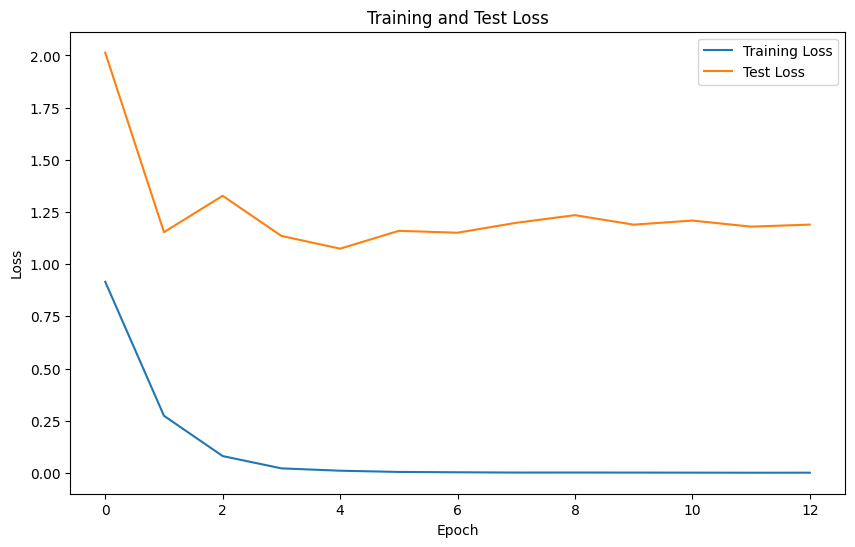

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()

In [21]:
test_correct_predictions = 0
test_total_samples = 0

Model.eval()
with torch.no_grad():
    for image, labels in test_loader:
        image, labels = image.to(device), labels.to(device)

        outputs = Model(image)
        loss = criterion(outputs, labels)   

        _, predicted = torch.max(outputs, 1)
        test_correct_predictions += (predicted == labels).sum().item()
        test_total_samples += labels.size(0)

test_accuracy = test_correct_predictions / test_total_samples
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Test Accuracy: 75.62%


In [22]:
incorrect = []
correct = []

# Put the model in evaluation mode
pre_model.eval()

# Go through the test dataset
for i in range(len(test_dataset)):
    image, label = test_dataset[i]
    image = image.to(device).unsqueeze(0)  

    with torch.no_grad():
        prediction = pre_model(image)
        y_hat = torch.argmax(prediction, dim=1).item()

    if y_hat != label:
        incorrect.append([image, y_hat, label])
    else:
        correct.append([image, y_hat, label])
print(f'Number of all samples: {len(test_dataset)}')
print(f'Number of incorrect samples: {len(incorrect)}')
print(f'Number of correct samples: {len(correct)}')

Number of all samples: 160
Number of incorrect samples: 39
Number of correct samples: 121


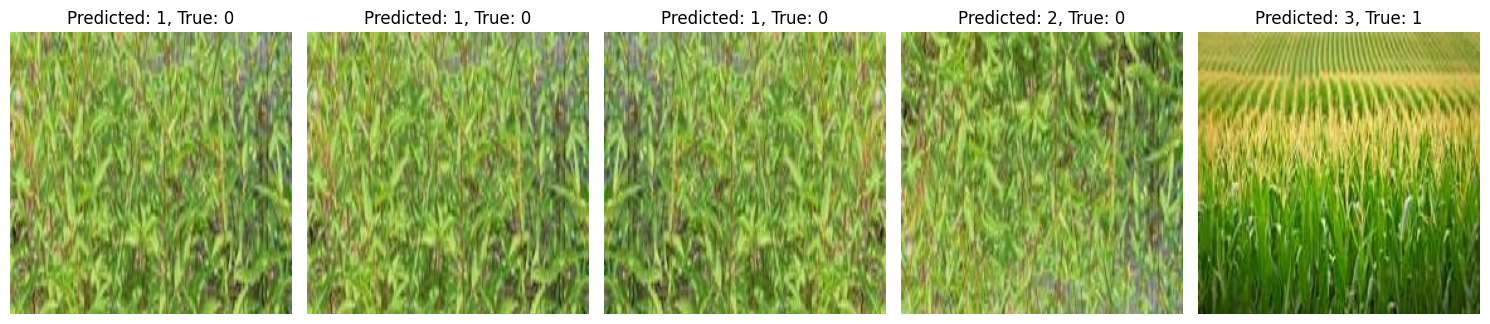

In [23]:
#Plot some incorrect samples
num_samples = min(len(incorrect), 5)  # Plot at most 5 incorrect samples
plt.figure(figsize=(15, 10))
for i in range(num_samples):
    image, y_hat, label = incorrect[i]
    image = image.squeeze(0).cpu().numpy()  
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(np.transpose(image, (1, 2, 0))) 
    plt.axis('off')
    plt.title(f'Predicted: {y_hat}, True: {label}')

plt.tight_layout()
plt.show()

In [24]:
import torch

# Assuming 'Model' is your trained model
torch.save(Model.state_dict(), 'modelSpec.pth')


In [25]:
from IPython.display import FileLink

# Display a link to download the model file
file_link = FileLink('modelSpec.pth')
file_link


c:\Users\msabh\Desktop\3rdYr_1stSem\CropClassification\Check\modelSpec.pth

In [26]:
torch.save(Model.state_dict(), 'modelSpec.pth')


In [27]:
import torch
from torchvision import transforms
from PIL import Image

def predict(path, model):
    # Load and preprocess the image
    img = Image.open(path).convert('RGB')  # Ensure the image is in RGB format
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),  # Resize to the size expected by the model
        transforms.ToTensor(),  # Convert image to tensor
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
    ])
    img_tensor = preprocess(img).unsqueeze(0)  # Add batch dimension

    # Check if GPU is available and move the model and input tensor to the same device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    img_tensor = img_tensor.to(device)

    # Make sure the model is in evaluation mode
    model.eval()

    # Perform prediction
    with torch.no_grad():
        outputs = model(img_tensor)

    # Get the predicted class
    _, predicted = torch.max(outputs, 1)
    class_idx = predicted.item()

    # Map class index to class names
    classes = ['jute', 'maize', 'rice', 'sugarcane', 'wheat']
    return classes[class_idx]

In [28]:
predict("rice-field.jpg",Model)

'rice'